### What we are going to do in this Kernel:
#### 1. Understand the problem:
We look at each variable and do a philosophical analysis about their meaning and importance to this problem.
#### 2. Univarible Study:
We will just focus on the dependent variable("Sale Price") and try to know a little more about it.
#### 3. Multivariate Study:
We will try to understand how the dependent variable and independent variables relate.
#### 4.Basic Cleaning:
We will clean the dataset and handle the missing data, outliers and categorical data.
#### 5. Test assumptions:
We will check if our data meets the assumptions required by most multivariate data.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [37]:
train=pd.read_csv('train_HP.csv')
test= pd.read_csv('test_HP.csv')
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [38]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Analyzing our taget variable. i.e. SalesPrice

In [39]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Everything seems normal here, i.e. the dataset does not have any such features that would destroy my model.

C:\Users\User\Anaconda31\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


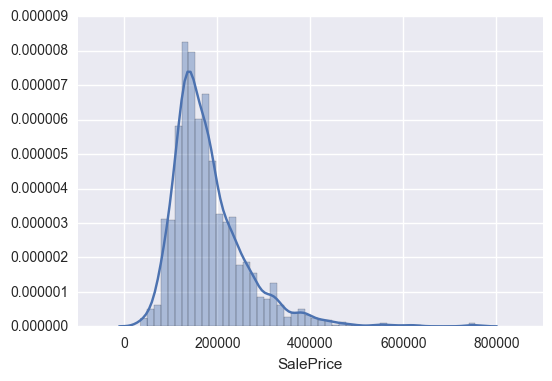

In [40]:
sns.distplot(train['SalePrice'])

#### Conclusions that we can make about SalePrice from this plot:
1-Deviates from normal distribution.

2-Have appreciable posetive skewness. (Skewness is the measure of asymmetry in the prob dist of a real valued random variable
about its mean. Skewness can be posetive or negative. If the curve is skewed towards the left then it is posetively skewed.)

3-Show peakedness. (Kurtosis: the sharpness of the peak of a freq dist couve.)

In [41]:
#skewness and kurtosis:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Relationship with numerical features:

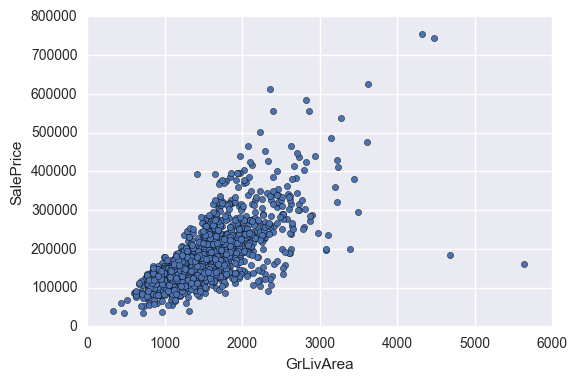

In [42]:
#Scatter Plot of GrLivArea vs SalePrice.
data=pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice',ylim=(0,800000))

It seems GrLivArea and SalePrice have an almost linear relationship.

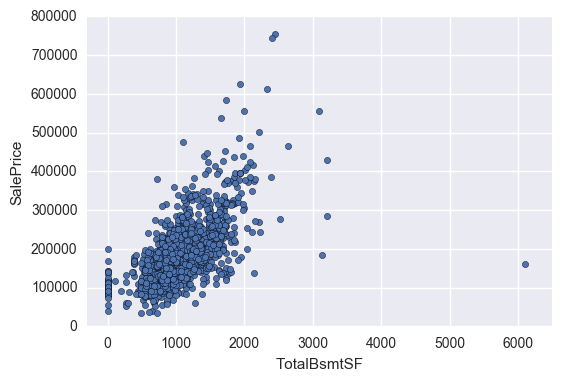

In [43]:
#Scatter Plot of TotalBsmtSF vs SalePrice
data=pd.concat([train['TotalBsmtSF'],train['SalePrice']],axis=1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice',ylim=(0,800000),xlim=(-300,6500))

This relationship seems more complex than the previous one. Initially everything is normal but we observe a sudden rise. So this may be an strong linear or exponential relation. Sometimes, TotalBsmtSF also gives 0 credit to SalePrice.

### Relationship with categorical Features

(-0.5, 9.5, 0, 800000)

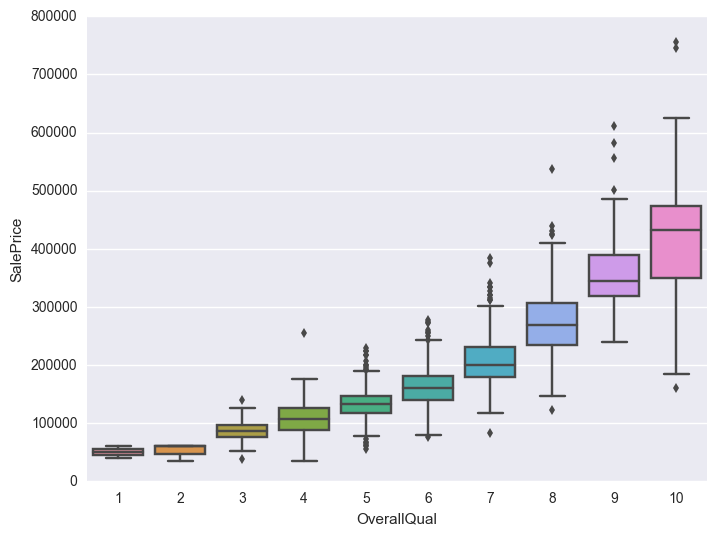

In [44]:
#Box plot of OverallQual vs SalePrice
data=pd.concat([train['OverallQual'], train['SalePrice']], axis=1)
f, ax= plt.subplots(figsize=(8,6))
fig= sns.boxplot(x='OverallQual',y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000)

This seem intuitively correct. The price of a higher quality house is greater.

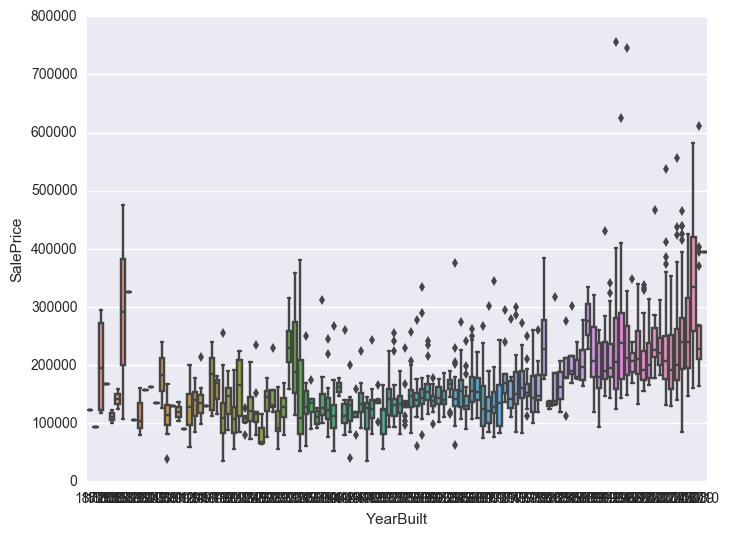

In [45]:
# Bar plot for YearBuilt vs SalePrice.
data=pd.concat([train['YearBuilt'], train['SalePrice']], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig= sns.boxplot(x='YearBuilt',y='SalePrice', data=data)

Although this does not show any strong relation, but we can say that a buyer is prone to spend more on a newer than on an older house.

Here we don't know if SalePrice are in Constant prices. Constant Prices tend to remove the effects of inflation. If SalePrice is not in constant prices then it should be, so that the prices are comparable over the years.

### Summary of above observations


    'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
    'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.


We just analysed 4 variables, but we should analyze much more. The trick here is selection of correct features (feature selection) and not the defination of complex relationship between them( feature enginnering)

Our approach so far has been very subjective. We need to do a more objective analysis.

### To explore the universe, we will do the following:
1-Correlation Matrix (HeatMap Style).

2-'SalePrice' Correlation Matrix (Zoomed heatmap style).

3-Scatter plot between the most correlated variables. (move like Jagger stlye).

#### Correlation Matrix (HeatMap Style)

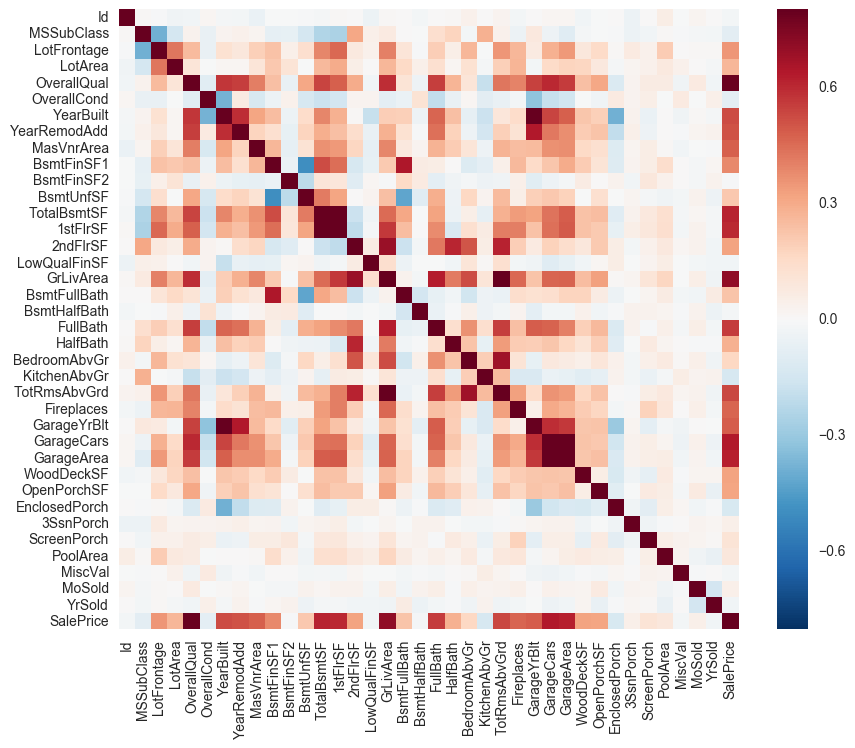

In [46]:
corrmat= train.corr()
f, ax= plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=0.8, square=True)

HeatMap is the best way to get a quick overview of the realtionship between the variables in the dataset.

At first there are 2 red coloured squares that catch my attention. The first one belongs to 'TotalBsmtSF' and 'FirstFlrSF' whlie the second  one belongs to 'GarageX' variables. Both cases show how significant the relationship is between these variales. Actually, this correaltion is so strong that it can represent the case of multicollinearity. If we think about these variables, we can conclude that they give almost the same information, thus multicollinearity occurs.Heatmap is a great way to detect such problems. Thus in problems dominated by feature selection, it is a major tool.

Another thing that caught my attention was the SalePrice correlation. Some variables like 'OverallQula', 'TotalBsmtSF', 'GrLivArea' etc are highly correlated but there are many other variables that should also be taken into account. 

#### Sales Price Correlation Matrix (Zoomed heatmap style)

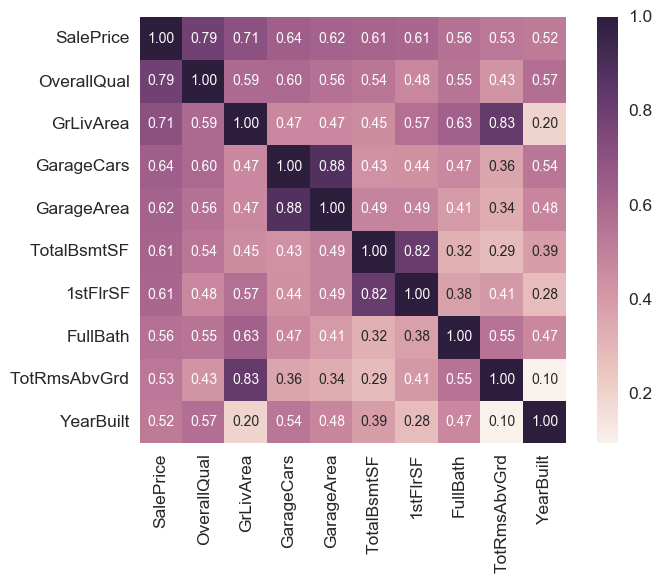

In [47]:
k= 10 #Number of variables for heatmap.
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

These are the variables most related to SalePrice.

Observations from the above graph:

 GarageCars and GarageArea are very strongly correlated. They are like twins, we would never be able to distinguish between them. It also seems correct as the number of cars that we can put in garage is proportional to the area of the garage. Thus, we need only one of these 2 variables.
 Similarly, TotalBsmtSF and 1stFlrSF are also very strongly correlated.

#### Scatter Plot between 'SalePrice' and correlated variables (move like Jagger style)

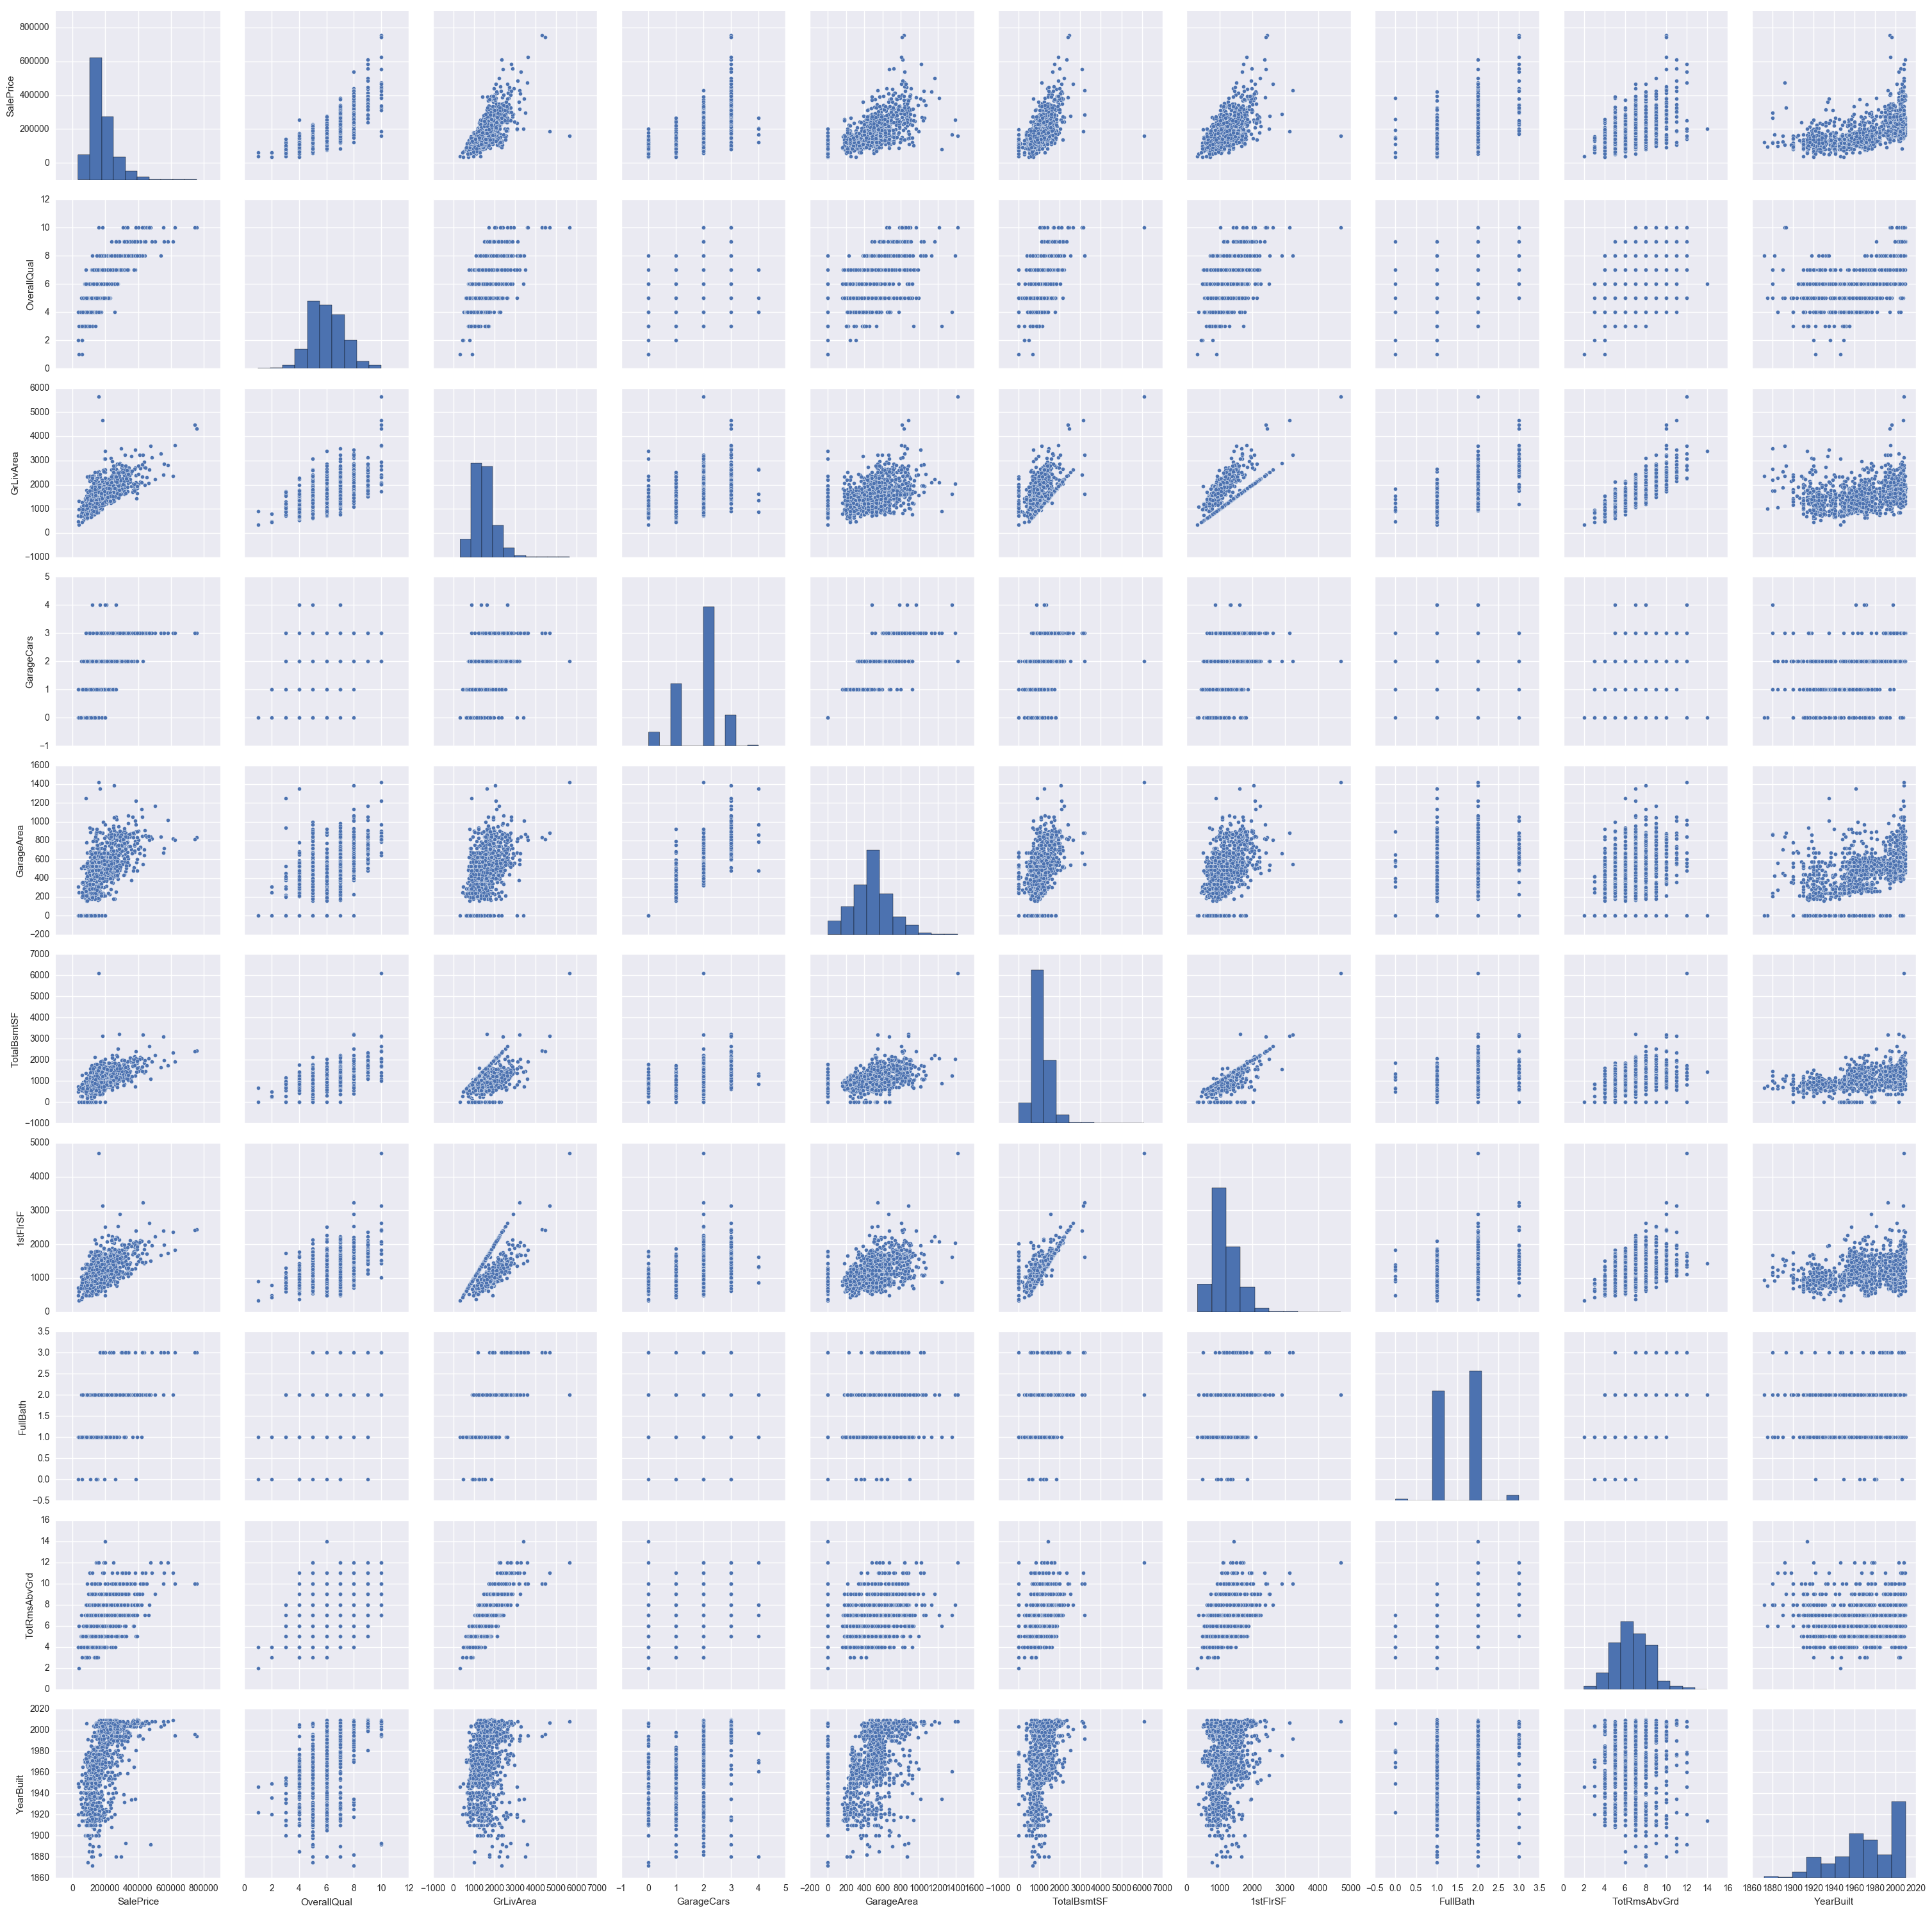

In [48]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(train[cols],size=3)
plt.show()

This mega scatter plot gives us reasonale idea about the realationship between the variables.

One of the interesting graph is between GrLivArea and TotBsmtSF. Here we can see dots drawing a line, which almost acts like a border. It makes sense that majority of the dots remain below this line. Basement area can be equal to the above ground living area but it is not expected that basement area to greater than living area.

### Missing Data

Important questions to keep in mind when thinking about missing data:

1- How prevelent is missing data?

2- Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply reduction of sample size. This can prevent us from proceeding with analysis. Moreover, from substantiative perspective, we need to ensure that missing data process is not biased and hiding a hidden truth.

In [49]:
#isnull() returns true is the corresponding cell is Null. 
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let us analyze this to understand how to work with missing data.

We consider a threshold, such if the percentage of missing data is more than the threshold, then we simply ignore this feature as if it never existed i.e. we don't apply any tricks to fill them. Let us suppose this threshold to be 15%.

As per this threhold, we will lose some variables like PoolQC, MiscFeatures, Alley, Fence etc. However, we would lose very less information because none of these variables are strongly related to our target variable. Moreover if we closely look at these variables, we can say that they are strong candidates for outliers, so we happily remover these variables from our dataset.

Now garageX variables have about 5% missing data. The significant GarageX variable is 'GarageCars', which doesn't have any missing data, so we will delete the garageX variables included here. Similar procedure can be adopted for BsmtX and MasVnrX variables.

Now only electrical is left with just 1 missing data. Since it is just one observation, we can remove this instance and keep the varaible in the dataset.

In [50]:
#Delete all variales where the count of missing data is more than 1.
train=train.drop((missing_data[missing_data['Total']>1]).index,1)
train=train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

## Outliers
Outliers behave different from rest of data. They can effect our model. They can be a valuable source of information providing us information about some specific behaviour.

### 1- Univariate Analysis:
Here we establish a threshlod to define a data observation as on outlier. To do so we will standardize the dataset. In this context, data standardization means to convert data values such that their mean is 0 while their standard deviation is 1. 

In [53]:
from sklearn.preprocessing import StandardScaler
#np.newaxis is used to increase the dimension of current array.
#[:,np.newaxis] would convert the 1-D SalePrice column in 2-D matrix form.  
saleprice_scaled= StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
print(saleprice_scaled.shape)
#argsort() is used to sort a numpy array.
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of distribution')
print(low_range)
print('\nouter range (high) of distribution')
print(high_range)

(1459, 1)
outer range (low) of distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of distribution
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


From above calculations we can conclude that low range values are similar and not too far from 0, while the high range values are far from 0 and some values (7.X) are really out of bound.

For now, we do not declare any value as an outlier, but we should pay special attentions to the 7.X values.

### 2- Bivariate Analysis:

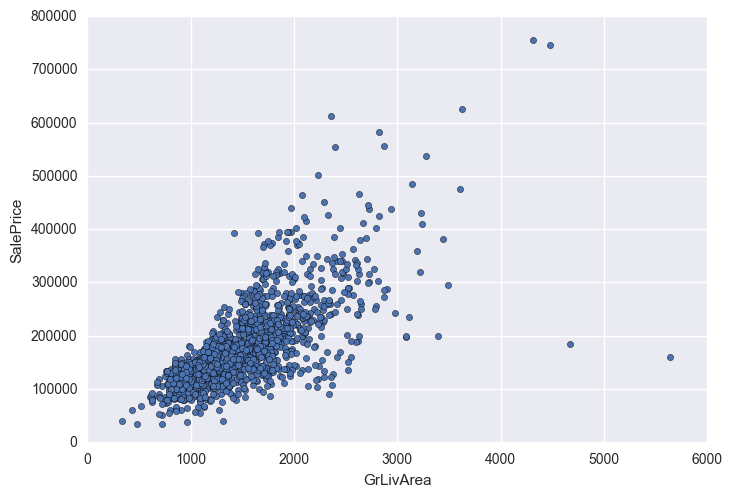

In [55]:
#Bivariate analysis of SalePrice vs GrLivArea
data=pd.concat([train['SalePrice'],train['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000))

Things we can say from above graph:

1- Two values with bigger 'GrLivArea' seem strange and they are not following the trend. They may be agricultural land which would explain their lower cost. Anyway they are not the representative of a typical case, so we delete them and declare them as outliers.

2- Two observations at the top right are those with 7.X values. They look like 2 special case, but they are following the trend so we keep them in the dataset. 

In [56]:
#Deleting the outliers
train.sort_values(by='GrLivArea',ascending=False)[:2]
train=train.drop(train[train['Id']==1299].index)
train=train.drop(train[train['Id']==524].index)
print(train.shape)

(1457, 63)


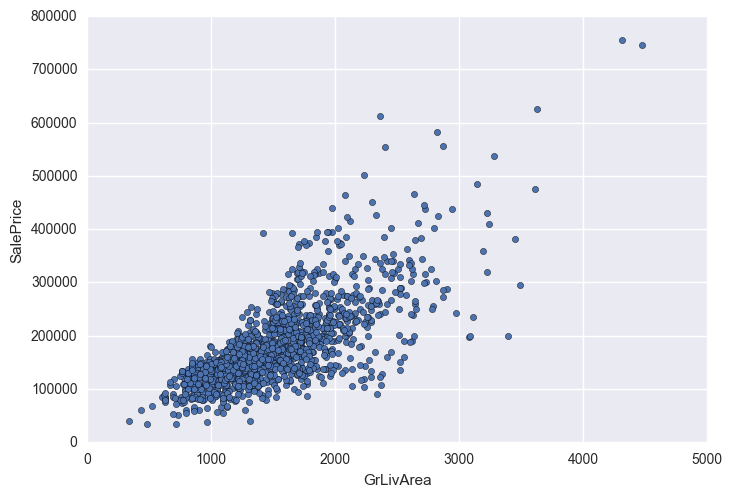

In [57]:
data=pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000))

So far we have done some data cleaning and discovered a lot about 'SalePrice'. Now, we would understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivarite techniques.

Four assumptions must be tested for this:

#### 1- Normality:
When we talk about normality, we mean that data should look like normal distribution. This is important because several statistics rely on this (e.g. t-statistics). Here, we would just check univariate normality for 'SalePrice' (which is a limited approach). Univariate normality does not ensure multivariate normality, but it helps. For a dataset with a lot of observations (>200) , normality is not an issue. However, if we solve normality, we can avoid a lot of other problems (e.g. hetroscedacity), thus we would be solving this here.

#### 2- Homoscedasticity: 
It refers to the 'assumption that dependent variable(s) exhibit equal level of variance accross the range of predictor variables(s)'. Homoscedasticity is important because we would want the error term to be same across all values of independent variables.

#### 3- Linearity:
The most common way to access linearity is to do a scatter plot and search for linear patterns. If the patterns are not linear, it will be worthwhile to explore data transformations. Here, most of the scatter plots that we have seen have some linear realtionship. 

#### 4- Absence of correlated errors:
It happens when one error is correlted to another. For instance, if one posetive error makes one negtive error systematically then it means that there is a relationship between these variables. This occurs often in time series, when some patterns are time related. 

C:\Users\User\Anaconda31\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


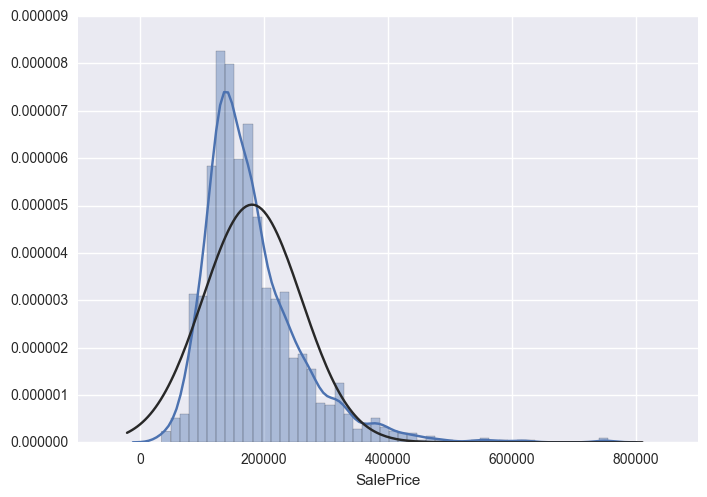

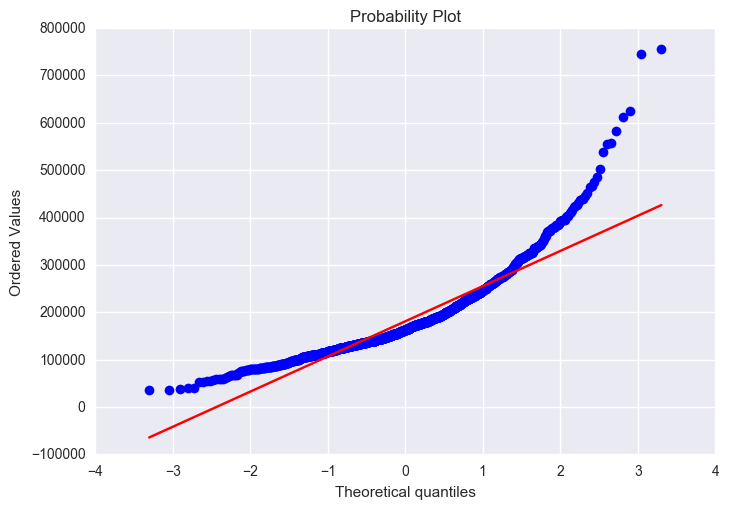

In [63]:
#Histogram and Normal Probablity Plot.
#Histogram is used to determine skewness and kurtosis.
#Normal Probablity Plot- Data distriution should closely follow the diagonal that represets normal distribution.
sns.distplot(train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)

So, 'SalePrice' is not normal, it shows peakedness, posetive skewness and does not follow the diagonal line. 

Data transformation can solve this problem. In case of posetive skewness, log transformation generally works

In [64]:
#Applying log transformation:
train['SalePrice']=np.log(train['SalePrice'])

C:\Users\User\Anaconda31\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


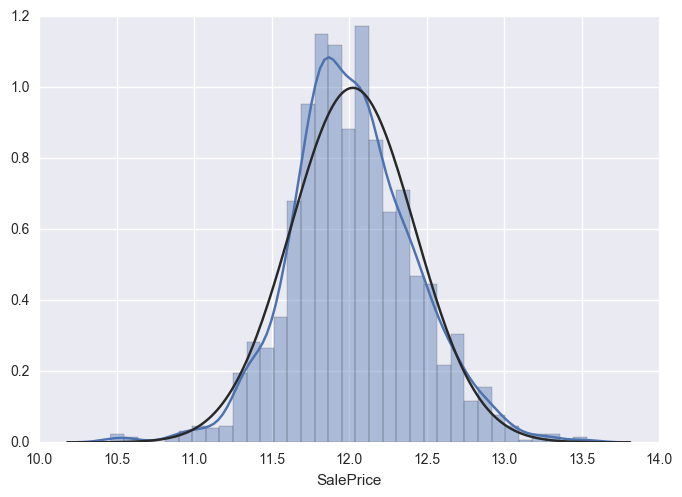

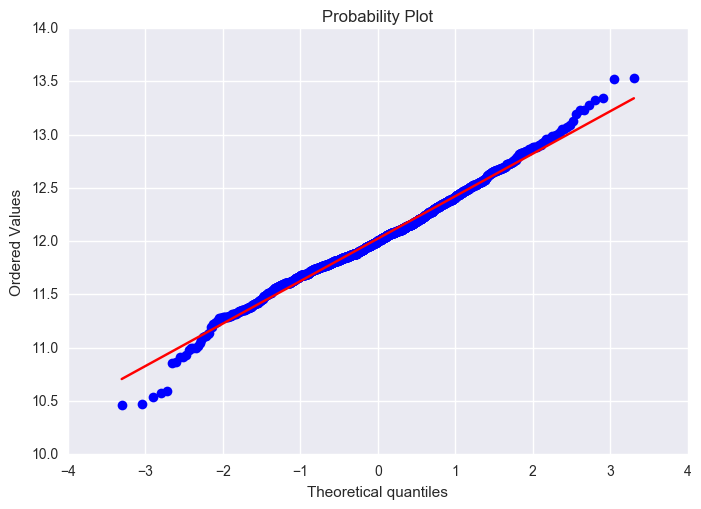

In [70]:
# Transformed histogram and normal distribution plot.
sns.distplot(train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)

Lets check 'GrLivArea' now.

C:\Users\User\Anaconda31\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


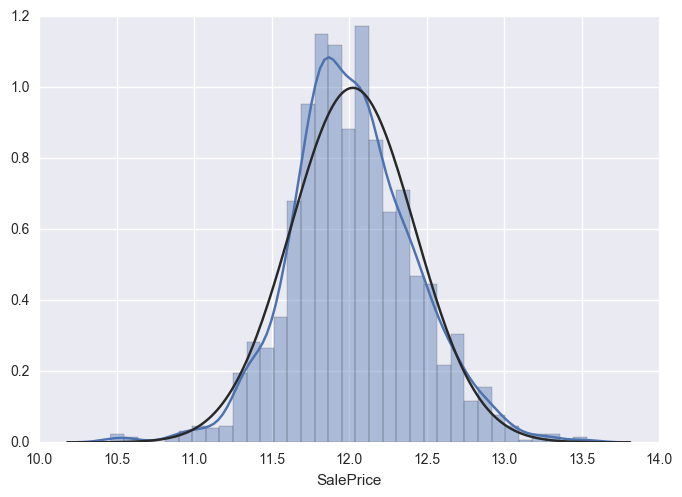

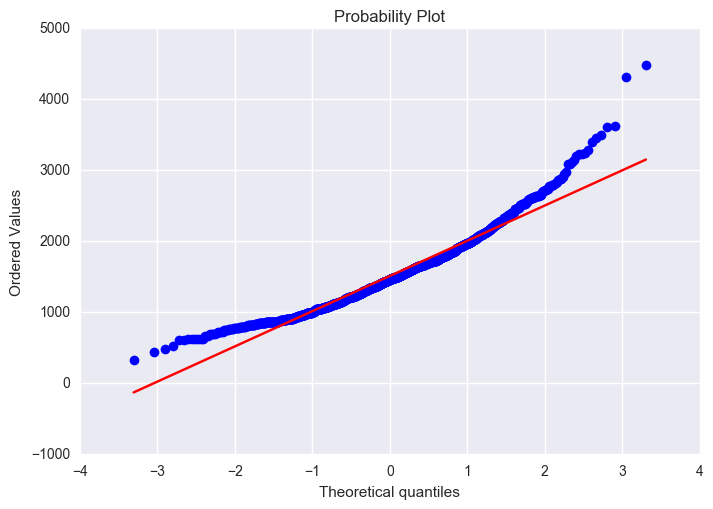

In [74]:
sns.distplot(train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(train['GrLivArea'],plot=plt)

Looks a bit skewed, lets apply log transformation

In [75]:
train['GrLivArea']=np.log(train['GrLivArea'])

C:\Users\User\Anaconda31\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


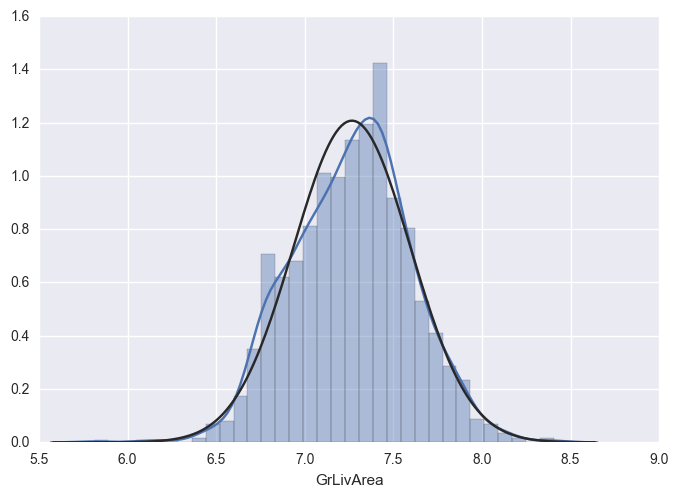

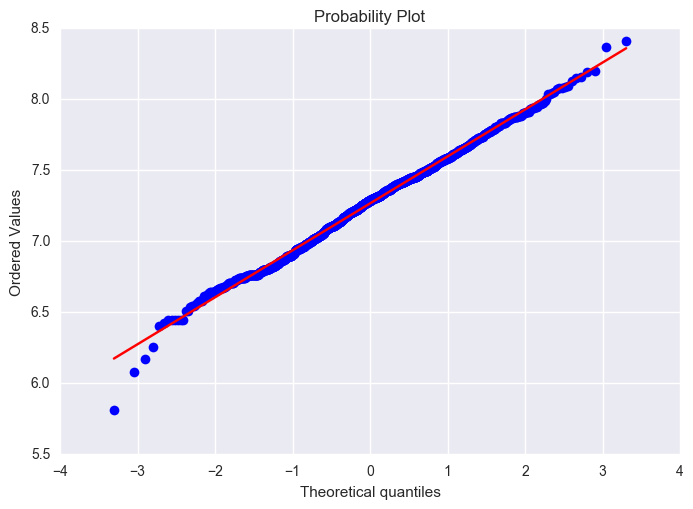

In [77]:
sns.distplot(train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(train['GrLivArea'],plot=plt)

Now for 'TotalBsmtSF'

C:\Users\User\Anaconda31\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


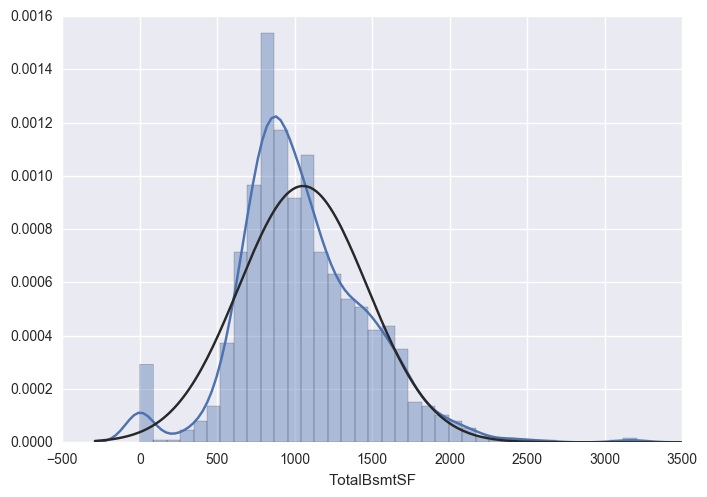

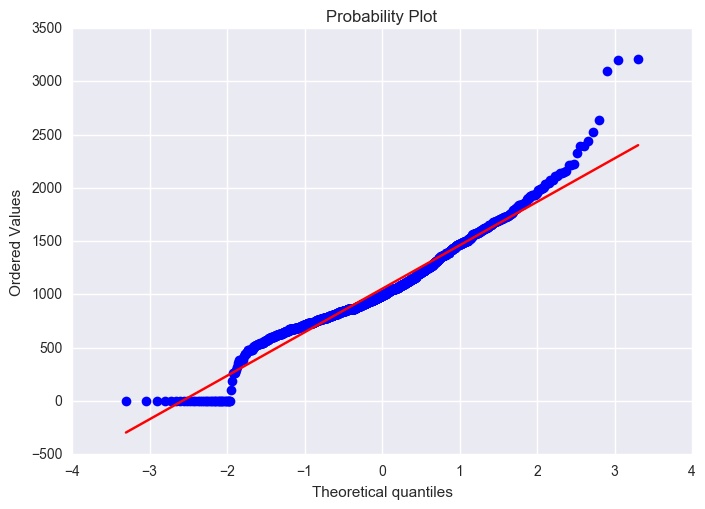

In [80]:
sns.distplot(train['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(train['TotalBsmtSF'],plot=plt)

This is something different, lets analyze what we have here:

1- Skewness

2- A significant number of observations with value 0(Houses without basement).

3- A big problem because value 0 does not allow us to log transforamtion.

To apply log transform here, we will create a variable that can get the effect of having or not having a basement (binary variable). Then we will do a log transform to all the non-zero observations, ignoring those with value 0. This way we can transform the data without having to lose the effect of having or not having a basement.

In [84]:
#Create a new colum for the new variable. If the area>0 it gets 1 otherwise it gets 0.
train['HasBsmt']=pd.Series(len(train['TotalBsmtSF']),index=train.index)
train['HasBsmt']=0
train.loc[train['TotalBsmtSF']>0,'HasBsmt']=1
#print(train[train['HasBsmt']==0].count())

In [85]:
#Transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF']=np.log(train['TotalBsmtSF'])

C:\Users\User\Anaconda31\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


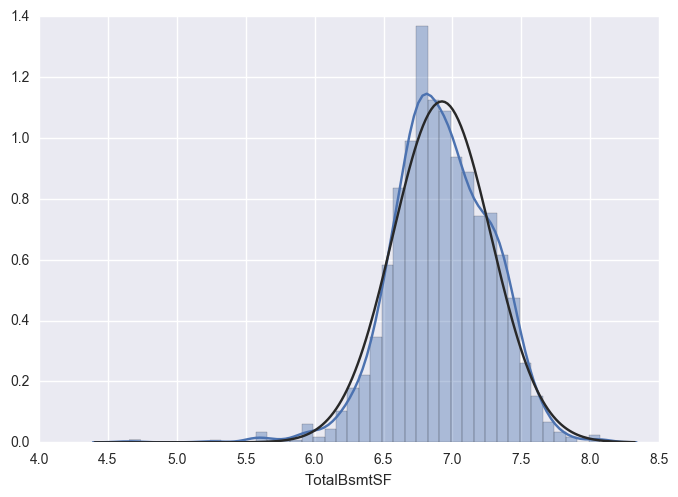

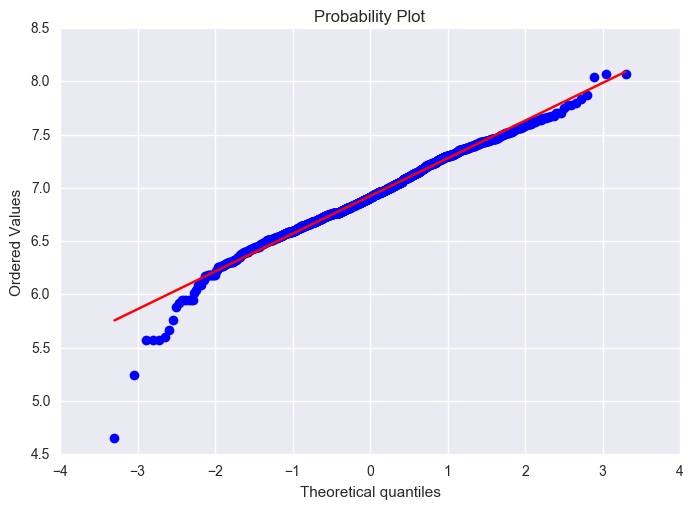

In [90]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

### For Homoscedasticity:
The best way to test homoscedasticity for 2 matric varibles is through graphical methods. Departures from equal dispersions are shown by shapes such as cones( small dispersion at one side of the graph and large dispersion at the opposite end) or diamonds (large dispersion at the centre of the graph).

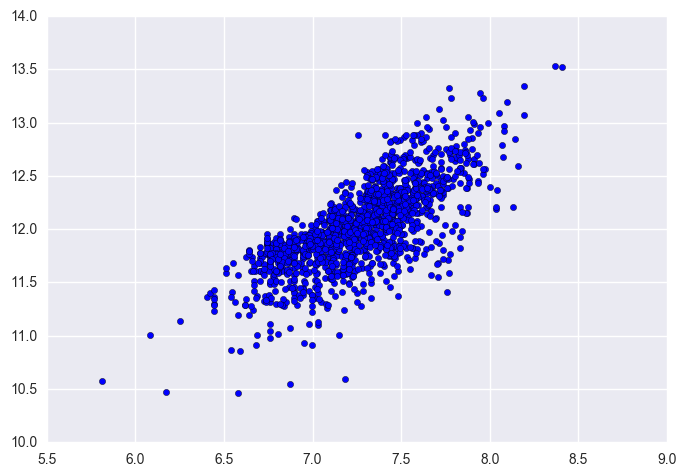

In [91]:
plt.scatter(train['GrLivArea'],train['SalePrice'])

Previous versions of the scatter plot had a conic shape (scatter plot between 'SalePrice' and correlated variables in move like Jagger plot). The current plot does not have a conic shape anymore. This is the power of normality, just by transforming for normality, we have solved for homoscedasticity.

### Dummy Variables

In [92]:
#Convert categorical variables into Dummy variables.
train=pd.get_dummies(train)